In [25]:
from fairness.matching import compute
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from fairness.pre_processing import fix_protected_attributes
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./dataset/student-por.csv', sep=';')

In [3]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
columns_to_drop = ['school', 'address', 'G1', 'G2']
protected_attributes = ['sex', 'health', 'romantic']
output_column = 'G3'

In [5]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
fair_dataset = compute(dataset, protected_attributes, output_column, columns_to_drop)

unfair
Hello
Finished
                                               Antecedent      Consequent   
0                                                      []   [Pstatus = 1]  \
1                                                      []  [failures = 0]   
2                                                      []    [higher = 1]   
3                                                      []   [nursery = 1]   
4                                                      []      [paid = 0]   
...                                                   ...             ...   
568501  [Dalc = 1, famsize = 0, schoolsup = 0, interne...   [nursery = 1]   
568502  [Dalc = 1, famsize = 0, schoolsup = 0, Pstatus...  [internet = 1]   
568503  [Dalc = 1, famsize = 0, schoolsup = 0, interne...    [higher = 1]   
568504  [Dalc = 1, famsize = 0, schoolsup = 0, interne...  [failures = 0]   
568505  [Dalc = 1, famsize = 0, schoolsup = 0, interne...   [Pstatus = 1]   

        Confidence  
0         0.876733  
1         0

In [7]:
fair_dataset

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,activities,nursery,internet,famrel,freetime,goout,absences,G3
0,18,0,0,4,4,0,4,0,1,2,2,0,0,1,0,4,3,4,4,11
1,17,0,1,1,1,0,2,0,0,1,2,0,0,0,1,5,3,3,2,11
2,15,1,1,1,1,0,2,2,1,1,2,0,0,1,1,4,3,2,6,12
3,15,0,1,4,2,1,3,1,1,1,3,0,1,1,1,3,2,2,0,14
4,16,0,1,3,3,2,2,1,0,1,2,0,0,1,0,4,3,2,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,0,1,2,3,3,2,0,1,1,3,1,1,0,1,5,4,2,4,10
645,18,1,1,3,1,4,3,0,1,1,2,0,0,1,1,4,3,4,4,16
646,18,0,1,1,1,2,2,0,1,2,2,0,1,1,0,1,1,1,6,9
647,17,1,1,3,1,3,3,0,1,2,1,0,0,0,1,2,4,5,6,10


In [26]:
fair_dataset = fix_protected_attributes(fair_dataset, ['G3'])

In [27]:
X = fair_dataset.iloc[:,:len(fair_dataset.columns) - 2]
y = fair_dataset.loc[:, output_column:]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
y

,G3
0,0
1,0
2,1
3,1
4,1
...,...
644,0
645,1
646,0
647,0


In [30]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [31]:
estimator = DecisionTreeClassifier()

parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [32]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs=10,
    cv=10,
    verbose=True
)

In [33]:
grid_search_classifier = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [34]:
y_pred = grid_search_classifier.predict(X_test)

In [35]:
print(accuracy_score(y_test, y_pred))

0.6564102564102564


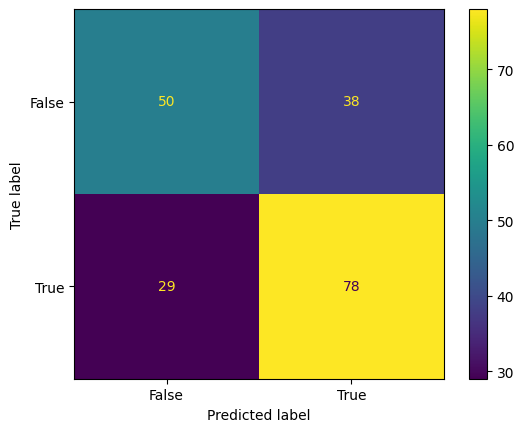

In [36]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()